# Epileptic Seizure Detection Using EEG Brain Signals



In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
# creating the dataframe

data=pd.read_csv('RawData_SNMC_EEG.csv')

# EDA

We know from data description that
<br><br>
Non-Seizure Data:<br>
<br>
Patient A: Rows 1 to 4,096 (16 seconds * 256 Hz)<br>
Patient B: Rows 4,097 to 8,192<br>
Patient C: Rows 8,193 to 12,288<br>
Patient D: Rows 12,289 to 16,384<br>
Patient E: Rows 16,385 to 20,480<br>
Patient F: Rows 20,481 to 24,576<br>
Patient G: Rows 24,577 to 28,672<br>
Patient H: Rows 28,673 to 32,768<br>
Patient I: Rows 32,769 to 36,864<br>
Patient J: Rows 36,865 to 39,424 (10 seconds * 256 Hz)<br>
Patient K: Rows 39,425 to 43,520<br>
<br>
Seizure Data:<br>

Patient A: Rows 43,521 to 55,040 (45 seconds * 256 Hz)<br>
Patient J: Rows 55,041 to 87,040 (125 seconds * 256 Hz)<br>
<br>

In [105]:
dfeda = data.copy()

In [106]:
dfeda = dfeda.drop('Outcome', axis=1)

In [107]:
print(dfeda.iloc[0])

FP2 - F4    14
F4 - C4    -57
C4 - P4      2
P4 - O2      1
FP2 - F8    38
F8 - T4    -46
T4 - T6    -83
T6 - O2     52
FP1 - F3   -33
F3 - C3    -28
C3 - P3    -39
P3 - O1     64
FP1 - F7   -65
F7 - T3    -30
T3 - T5     54
T5 - O1      5
Name: 0, dtype: int64


In [108]:
dfeda.head()

,FP2 - F4,F4 - C4,C4 - P4,P4 - O2,FP2 - F8,F8 - T4,T4 - T6,T6 - O2,FP1 - F3,F3 - C3,C3 - P3,P3 - O1,FP1 - F7,F7 - T3,T3 - T5,T5 - O1
0,14,-57,2,1,38,-46,-83,52,-33,-28,-39,64,-65,-30,54,5
1,-7,-81,49,-63,40,-34,-122,15,-23,0,-56,21,-27,12,-59,18
2,-3,-13,-12,-21,45,-32,-101,38,-11,1,-68,11,-2,56,-135,13
3,19,52,-86,86,48,-44,-48,114,-19,-25,-48,33,-11,34,-78,-5
4,39,34,-92,107,52,-53,-39,129,-34,-49,-29,63,-52,-18,36,-16


In [109]:
# Select the desired rows from the DataFrame
selected_dataA = dfeda.iloc[0:4095]
selected_dataB = dfeda.iloc[4096:8191]
selected_dataC = dfeda.iloc[8192:12287]
selected_dataD = dfeda.iloc[12288:16383]
selected_dataE = dfeda.iloc[16384:20479]
selected_dataF = dfeda.iloc[20480:24575]
selected_dataG = dfeda.iloc[24576:28671]
selected_dataH = dfeda.iloc[28672:32767]
selected_dataI = dfeda.iloc[32768:36863]
selected_dataJ = dfeda.iloc[36864:39423]
selected_dataK = dfeda.iloc[39424:43519]
selected_data_seizA = dfeda.iloc[43520:55039]
selected_data_seizJ = dfeda.iloc[55040:87039]


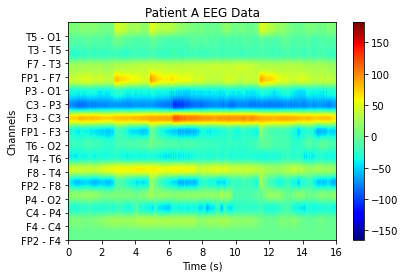

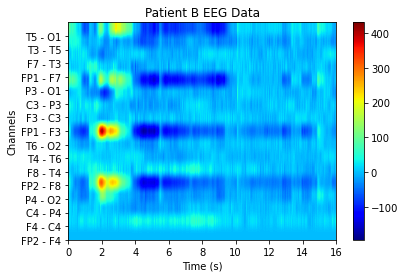

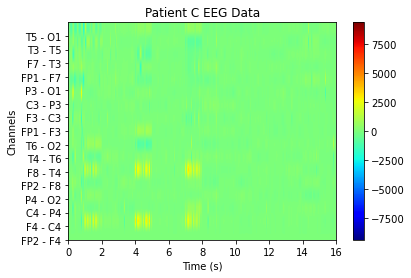

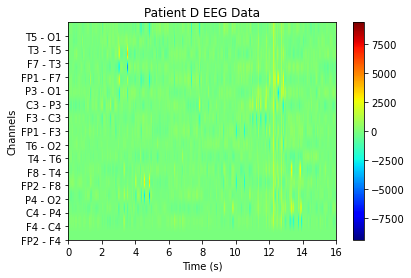

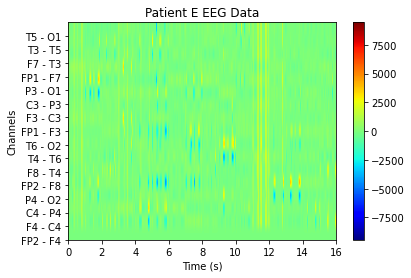

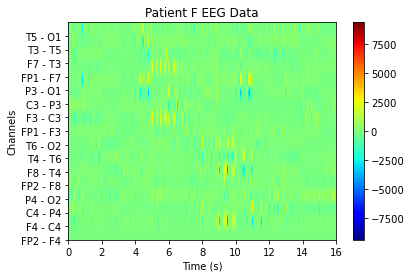

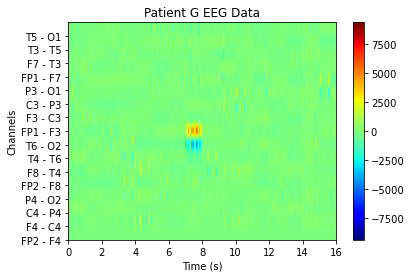

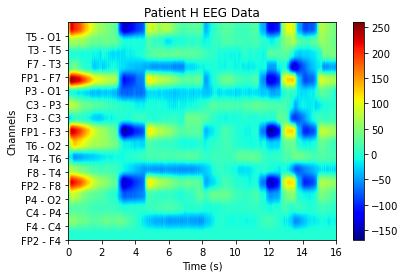

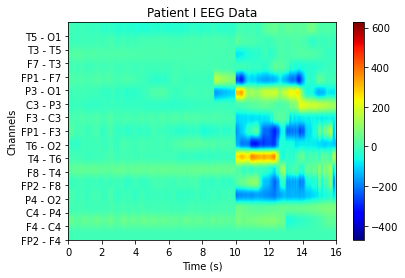

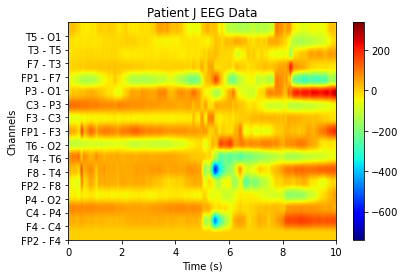

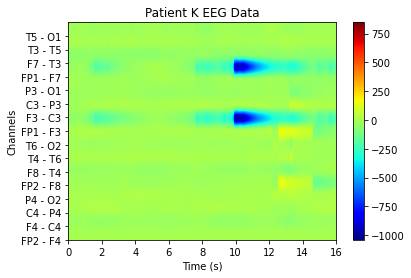

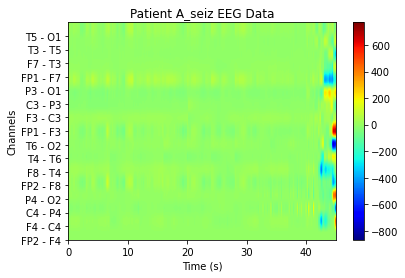

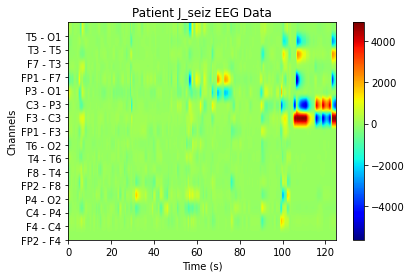

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the EEG data from the CSV file using Pandas
eeg_data = pd.read_csv('RawData_SNMC_EEG.csv')

# Define the patient ranges
patient_ranges = {
    'Patient A': (0, 4096),
    'Patient B': (4096, 8192),
    'Patient C': (8192, 12288),
    'Patient D': (12288, 16384),
    'Patient E': (16384, 20480),
    'Patient F': (20480, 24576),
    'Patient G': (24576, 28672),
    'Patient H': (28672, 32768),
    'Patient I': (32768, 36864),
    'Patient J': (36864, 39424),
    'Patient K': (39424, 43520),
    'Patient A_seiz': (43520, 55040),
    'Patient J_seiz': (55040, 87040)
}

# Define channel labels
channel_labels = ['FP2 - F4', 'F4 - C4', 'C4 - P4', 'P4 - O2', 'FP2 - F8', 'F8 - T4', 'T4 - T6', 'T6 - O2',
                  'FP1 - F3', 'F3 - C3', 'C3 - P3', 'P3 - O1', 'FP1 - F7', 'F7 - T3', 'T3 - T5', 'T5 - O1']

# Define the sampling rate
sampling_rate = 256

# Iterate through the patient ranges
for patient, (start, end) in patient_ranges.items():
    # Extract the EEG data for the current patient
    patient_eeg = eeg_data.iloc[start:end]

    # Extract the values from the DataFrame
    eeg_values = patient_eeg.values

    # Transpose the data to have channels as rows and time samples as columns
    eeg_values = eeg_values.T

    # Calculate the time axis based on the sampling rate
    num_samples = eeg_values.shape[1]
    time_axis = np.arange(num_samples) / sampling_rate

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the EEG data as an image plot
    image = ax.imshow(eeg_values, cmap='jet', aspect='auto', extent=[0, num_samples/sampling_rate, 0, len(channel_labels)])

    # Set appropriate labels for x and y axes
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Channels')
    ax.set_yticks(np.arange(len(channel_labels)))
    ax.set_yticklabels(channel_labels)

    # Add a colorbar
    colorbar = fig.colorbar(image)

    # Set the title for the plot
    ax.set_title(f'{patient} EEG Data')

    # Show the plot
    plt.show()


Patient: Patient A
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4096.000000  4096.000000  4096.000000  4096.000000  4096.000000   
mean     15.319580    -9.327881   -17.917236    33.223145    49.378906   
std      23.084104    47.793846    53.188441    64.507008    14.502494   
min     -34.000000   -91.000000  -108.000000   -76.000000    19.000000   
25%      -4.000000   -57.000000   -71.000000   -31.000000    39.000000   
50%      16.000000   -10.000000   -18.000000    33.500000    46.000000   
75%      31.000000    38.000000    34.000000    97.000000    57.000000   
max      85.000000    77.000000    73.000000   138.000000   107.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4096.000000  4096.000000  4096.000000  4096.000000  4096.000000   
mean    -38.763916   -76.708252    87.407227   -35.356934   -14.576904   
std      10.342920    32.871141    44.364003    17.510047    19.601636   
min     -70.000000

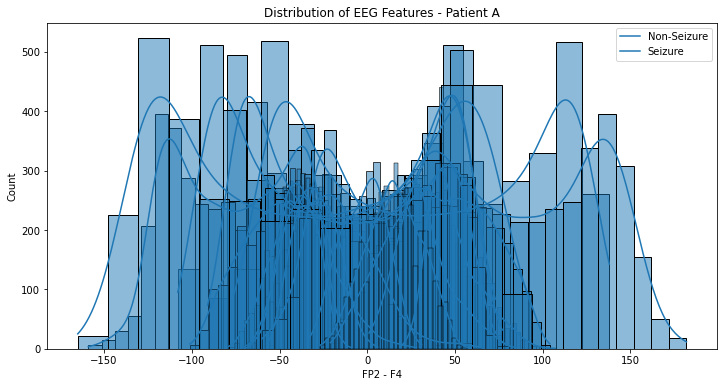

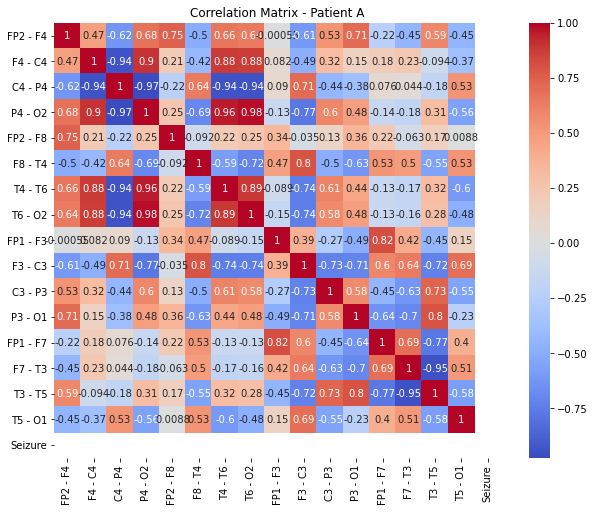

Patient: Patient B
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     -6.012210   -15.788767     2.557753     4.829304   -21.251770   
std      69.783085    24.152212    17.274615    17.571361    74.889816   
min    -140.000000  -109.000000   -62.000000   -76.000000  -159.000000   
25%     -65.000000   -30.000000   -10.000000    -6.000000   -88.000000   
50%       1.000000   -16.000000     3.000000     4.000000   -15.000000   
75%      24.000000    -2.000000    16.000000    14.000000    19.000000   
max     255.000000    66.000000    48.000000    77.000000   195.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     -3.854945     2.955311     7.733333   -21.073016    -0.330647   
std      23.402136    17.545438    12.494032   104.224101    15.873095   
min    -108.000000

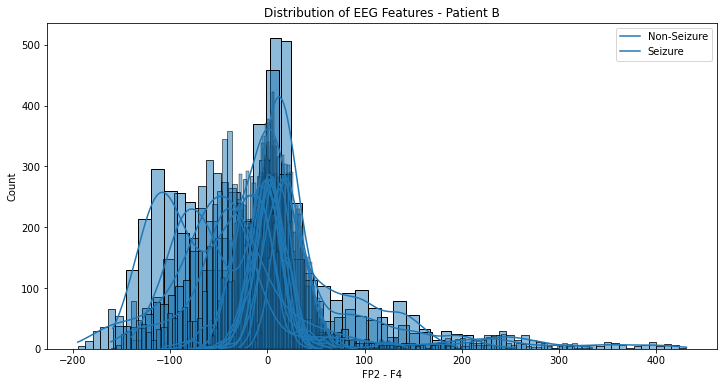

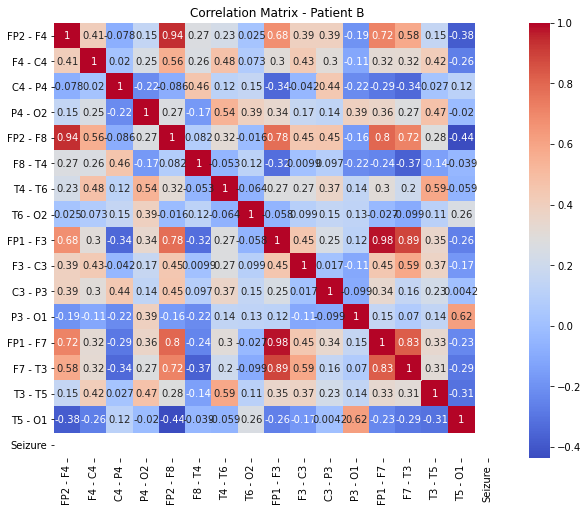

Patient: Patient C
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     11.213675   -22.135531   -40.730159    36.475946   -35.510134   
std     808.142442   891.059095   667.516196   538.391111   514.863923   
min   -9370.000000 -9184.000000 -9036.000000 -8702.000000 -8924.000000   
25%    -148.000000  -148.000000  -148.000000   -74.000000  -149.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     148.000000   185.000000   112.000000   112.000000   148.000000   
max    9370.000000  9197.000000  8701.000000  8813.000000  9222.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     20.562882    14.521856   -14.366545    47.285958   -24.169475   
std     502.790784   428.738350   556.741147   480.727423   584.786990   
min   -8442.000000

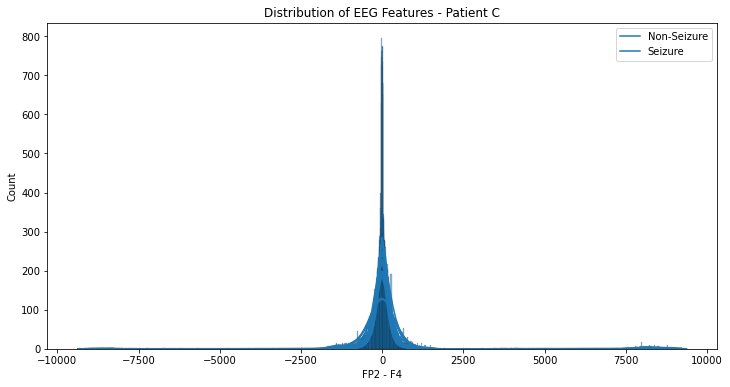

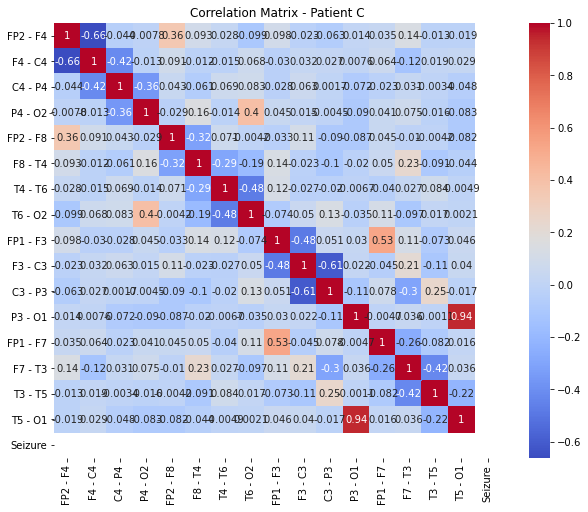

Patient: Patient D
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     25.077411    23.192674    21.159219    31.344567    12.151648   
std     844.401211   653.731315   735.534330   749.076848  1126.163417   
min   -9149.000000 -9072.000000 -8407.000000 -8924.000000 -9113.000000   
25%    -149.000000  -186.000000  -260.000000  -149.000000  -297.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%     223.000000   223.000000   223.000000   296.000000   186.000000   
max    9370.000000  8849.000000  8590.000000  8405.000000  8999.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     88.134310    23.416606   -22.494261    38.791697    54.598291   
std    1051.490202  1161.470627   958.756073   875.527411   663.707037   
min   -9335.000000

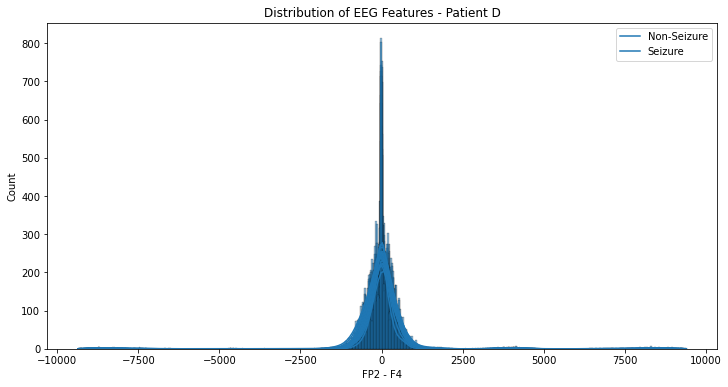

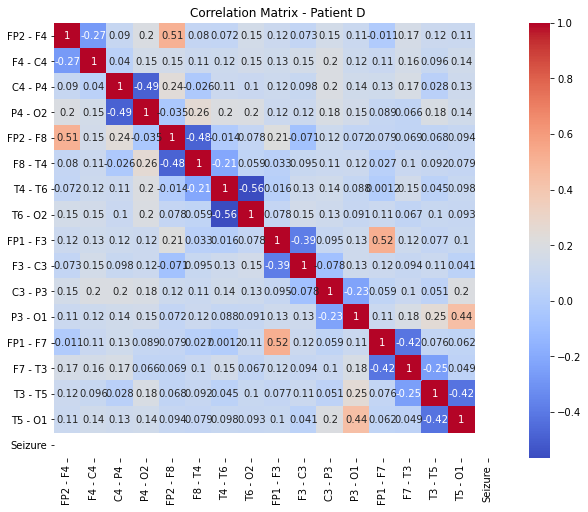

Patient: Patient E
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     49.611966    79.755067    13.795360   164.553846   110.697924   
std    1018.989068  1056.405269  1056.809154   925.189321  1340.153290   
min   -9296.000000 -9370.000000 -9184.000000 -9074.000000 -9333.000000   
25%    -150.000000  -222.000000  -223.000000  -148.000000  -258.000000   
50%       0.000000     0.000000     0.000000    74.000000     0.000000   
75%     186.000000   113.000000   186.000000   335.000000   223.000000   
max    9259.000000  9184.000000  9334.000000  8852.000000  8924.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     19.485958    49.623687   128.394383    64.037851    48.273504   
std    1313.778555   898.628449   865.766665  1671.187528  1662.995146   
min   -9297.000000

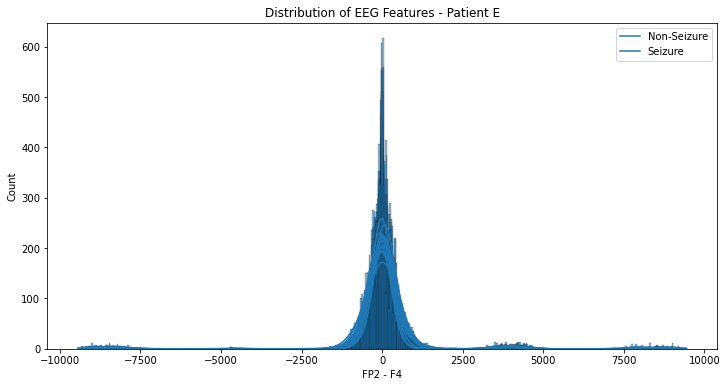

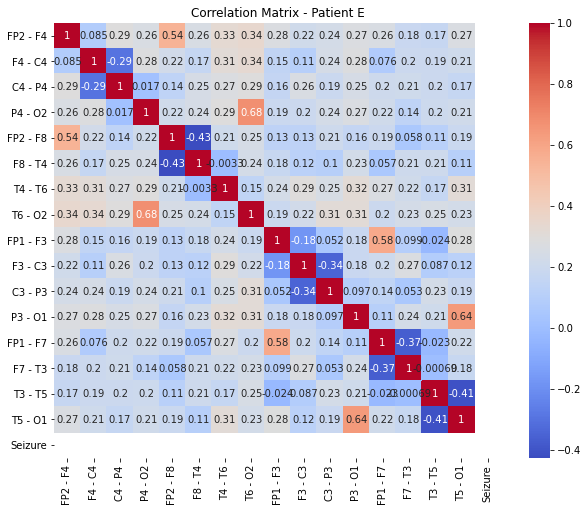

Patient: Patient F
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     26.289621    54.767277   -93.487424   116.465201   124.328449   
std    1344.765528  1304.642690  1007.315050  1291.970170  1446.511903   
min   -9332.000000 -8999.000000 -8851.000000 -9035.000000 -9333.000000   
25%    -260.000000  -185.000000  -298.000000  -223.000000  -185.000000   
50%       0.000000    37.000000   -37.000000     0.000000    37.000000   
75%     223.000000   335.000000   185.000000   221.000000   314.000000   
max    9369.000000  9111.000000  8814.000000  9221.000000  9292.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean    -89.196337    11.869109    57.568498    65.263492    42.162149   
std    1504.180736  1248.333650  1446.566384   894.997160  1284.996374   
min   -9108.000000

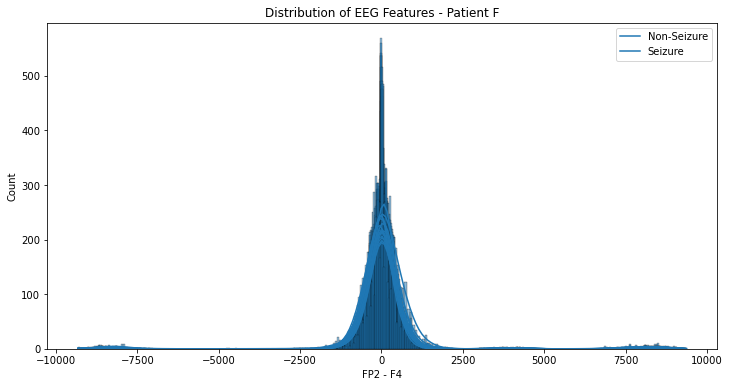

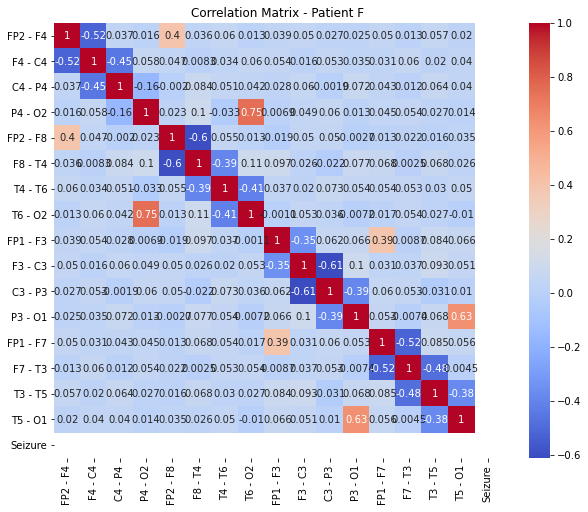

Patient: Patient G
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean    -30.890110    24.655433    -1.650061    10.644689    21.820513   
std     889.638954   771.560652   703.945507   709.118136   998.900819   
min   -9334.000000 -9073.000000 -9073.000000 -8998.000000 -9185.000000   
25%    -223.000000  -222.000000  -222.000000  -260.000000  -186.000000   
50%      -1.000000     0.000000     0.000000     0.000000     0.000000   
75%     186.000000   260.000000   221.000000   223.000000   260.000000   
max    9258.000000  9072.000000  8813.000000  8998.000000  9184.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean      8.457143   -16.608547    -9.956777   212.530403  -183.626374   
std     884.317399   748.116222   767.134406  1553.401299  1478.264487   
min   -9147.000000

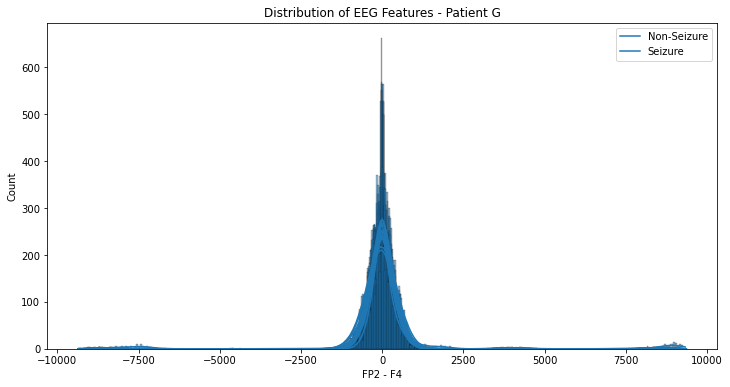

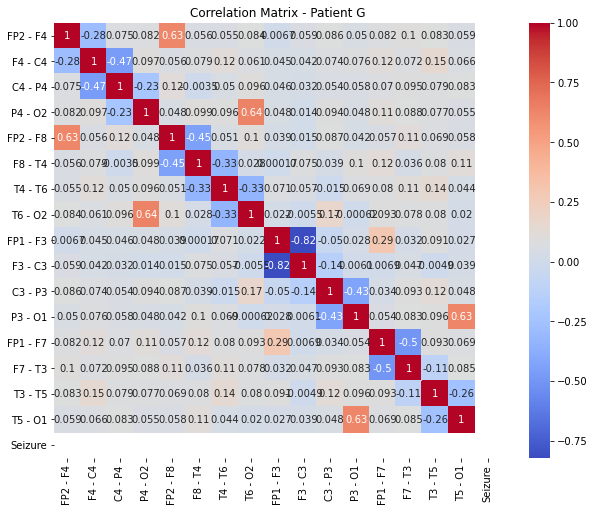

Patient: Patient H
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     18.545055    19.025641     4.835409   -27.557021    32.103541   
std      78.076227    23.151813    20.497781    29.566591    85.158079   
min    -155.000000   -30.000000   -36.000000  -145.000000  -146.000000   
25%     -35.000000     0.000000   -11.000000   -45.000000   -35.000000   
50%      25.000000    15.000000    -1.000000   -21.000000    31.000000   
75%      66.000000    35.000000    24.000000    -9.000000    84.000000   
max     234.000000    76.000000    59.000000    49.000000   260.000000   

           F8 - T4      T4 - T6      T6 - O2    FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.00000  4095.000000   
mean    -24.313797     8.965812    -1.886203    15.53895    15.376068   
std      22.045140    22.468494    24.591111    87.24196    34.784994   
min     -92.000000   -

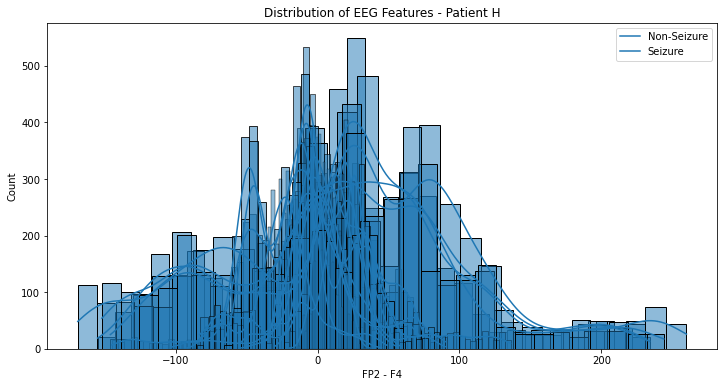

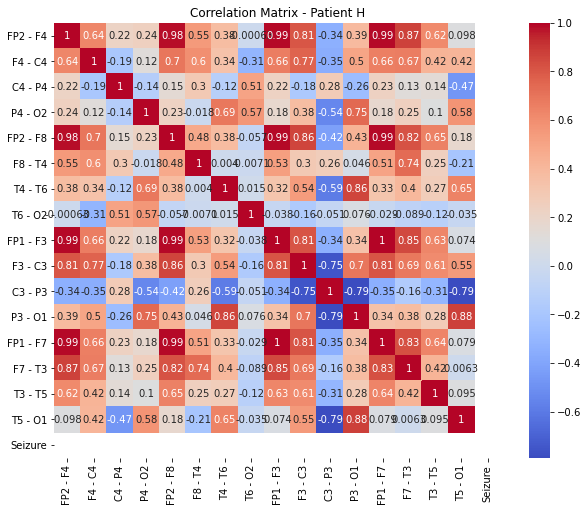

Patient: Patient I
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     -7.206349     2.681563     4.377289    -5.551893   -32.998046   
std      29.734021    13.175461    29.047348    28.436710    90.449472   
min     -52.000000   -49.000000   -92.000000   -94.000000  -323.000000   
25%     -31.000000    -4.000000   -15.000000   -24.000000   -80.000000   
50%     -17.000000     2.000000     7.000000    -5.000000    -5.000000   
75%      14.500000     9.000000    26.000000    17.000000    13.000000   
max      83.000000    66.000000    65.000000    96.000000   174.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean     22.770452    21.039316   -16.516972   -49.419536   -51.903053   
std     106.654676    65.865970    53.022883   109.552899    92.353340   
min    -169.000000

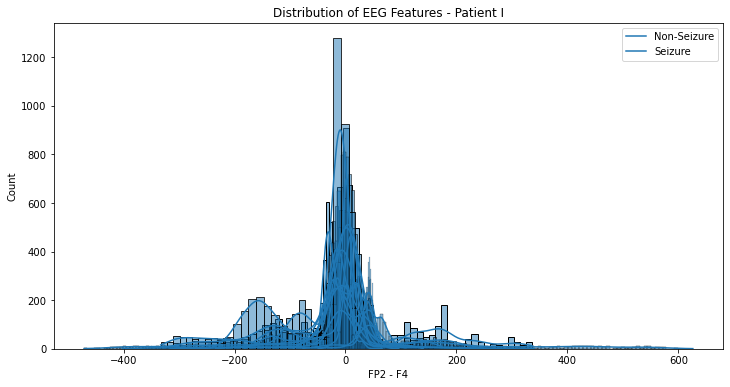

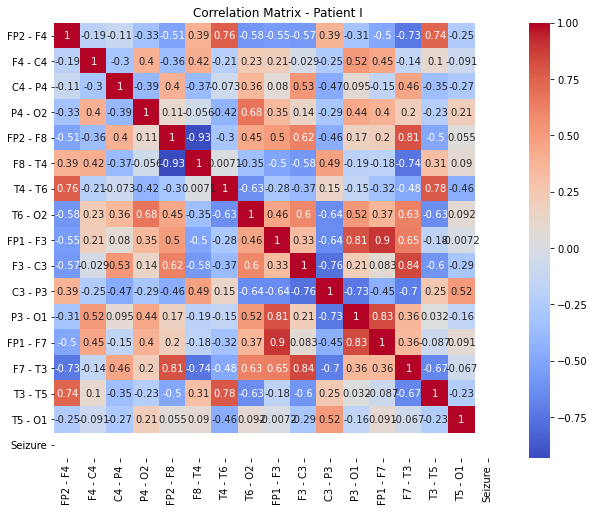

Patient: Patient J
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000   
mean    -28.369676   -24.081673   -13.795233     9.784291  -106.802267   
std      57.008930    43.870553    31.789529    36.838314    94.816254   
min    -157.000000  -158.000000  -210.000000   -63.000000  -313.000000   
25%     -58.000000   -37.000000   -27.000000   -17.000000  -156.000000   
50%     -20.000000   -18.000000   -15.000000     8.000000  -113.000000   
75%      10.000000     2.000000    -5.000000    29.000000   -54.500000   
max     106.000000    64.000000    68.000000   270.000000   176.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000   
mean     48.347401    13.270418   -11.250098    47.964048   -13.052755   
std      92.750589    72.368532    56.498030   117.596032    89.546289   
min    -153.000000

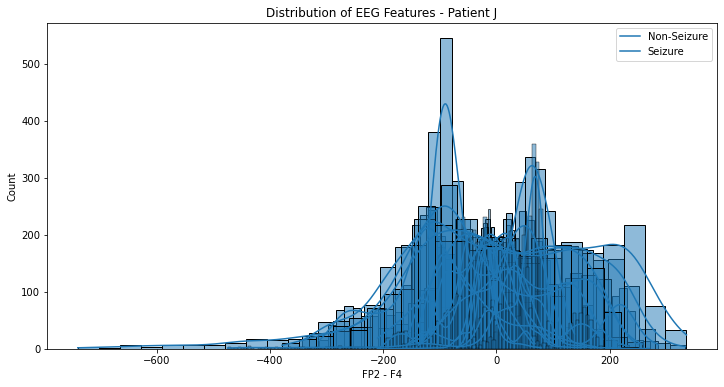

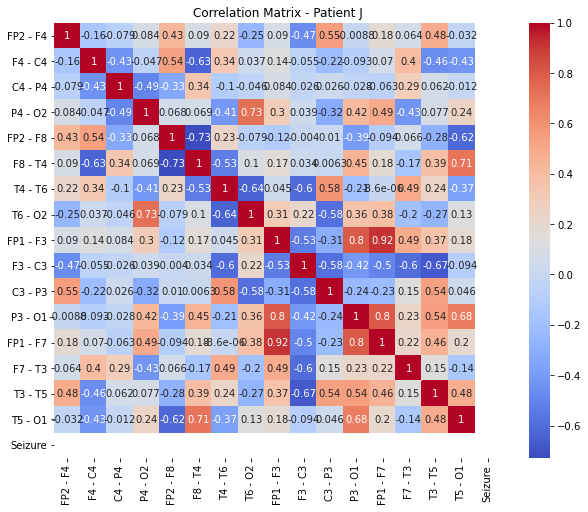

Patient: Patient K
          FP2 - F4      F4 - C4      C4 - P4      P4 - O2     FP2 - F8  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean    -13.179243     3.677167   -48.490598  -204.733089   -18.451526   
std      13.651415     9.454687    11.738306   224.188987    15.513284   
min     -67.000000   -26.000000   -99.000000 -1002.000000   -90.000000   
25%     -20.000000    -2.000000   -56.000000  -260.000000   -30.000000   
50%     -12.000000     4.000000   -49.000000  -155.000000   -17.000000   
75%      -6.000000    10.000000   -42.000000   -37.000000    -8.000000   
max      49.000000    34.000000     5.000000    15.000000    41.000000   

           F8 - T4      T4 - T6      T6 - O2     FP1 - F3      F3 - C3  \
count  4095.000000  4095.000000  4095.000000  4095.000000  4095.000000   
mean    -27.528694    13.689133  -230.436874    15.583639   -10.791697   
std      22.836606    25.525734   226.137753    54.638451    58.833439   
min    -114.000000

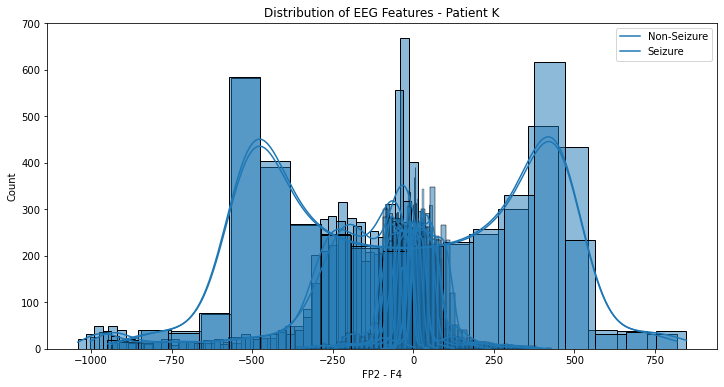

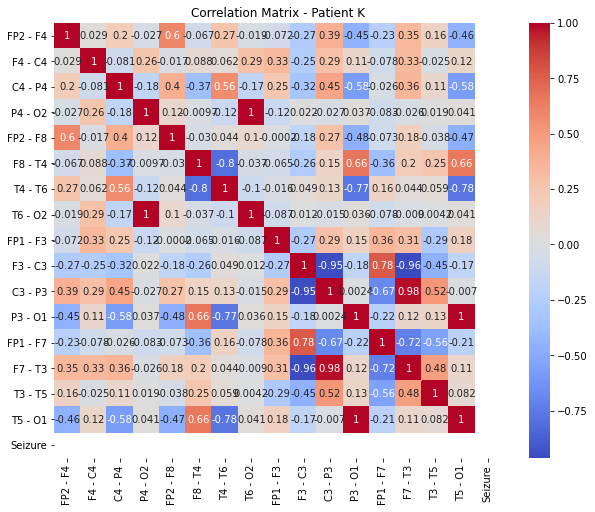

Patient: Patient A_seiz
           FP2 - F4       F4 - C4       C4 - P4       P4 - O2      FP2 - F8  \
count  11519.000000  11519.000000  11519.000000  11519.000000  11519.000000   
mean       8.823856     -2.717076     -6.439101     -0.281274      9.267471   
std       29.144450     53.303347     59.602434     65.893321     84.517557   
min     -145.000000   -147.000000   -338.000000   -405.000000   -470.000000   
25%      -10.000000    -54.000000    -59.000000    -62.000000      8.000000   
50%       10.000000     -3.000000     -5.000000      0.000000     23.000000   
75%       28.000000     48.000000     48.000000     63.000000     42.000000   
max       98.000000    168.000000    249.000000    185.000000    176.000000   

            F8 - T4       T4 - T6       T6 - O2      FP1 - F3       F3 - C3  \
count  11519.000000  11519.000000  11519.000000  11519.000000  11519.000000   
mean     -13.426426     -9.314611     12.865092      1.025783    -10.681830   
std       51.594960     50.

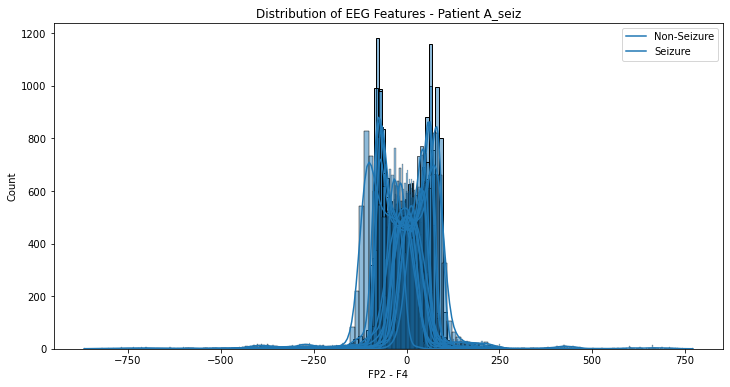

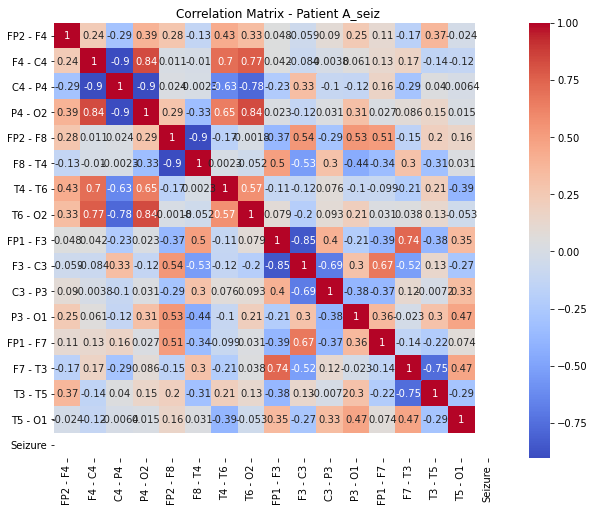

Patient: Patient J_seiz
           FP2 - F4       F4 - C4       C4 - P4       P4 - O2      FP2 - F8  \
count  31999.000000  31999.000000  31999.000000  31999.000000  31999.000000   
mean     -11.267665   -170.737773     80.336229     -2.713147    -78.627301   
std      287.236017    512.883333    476.130605    160.547196    827.285711   
min    -2189.000000  -2996.000000  -1699.000000   -605.000000  -5613.000000   
25%      -92.000000    -84.000000    -51.000000    -55.000000   -182.000000   
50%      -12.000000    -30.000000     -2.000000      4.000000    -32.000000   
75%       55.000000     10.000000     88.000000     51.000000    130.000000   
max     1414.000000    306.000000   2375.000000    846.000000   2969.000000   

            F8 - T4       T4 - T6       T6 - O2      FP1 - F3       F3 - C3  \
count  31999.000000  31999.000000  31999.000000  31999.000000  31999.000000   
mean    -137.426107   -113.841558    225.512704     -7.201913    -28.759461   
std      532.725051   1279.

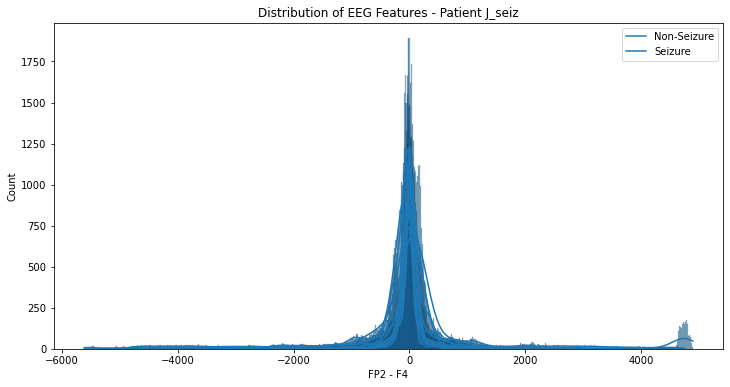

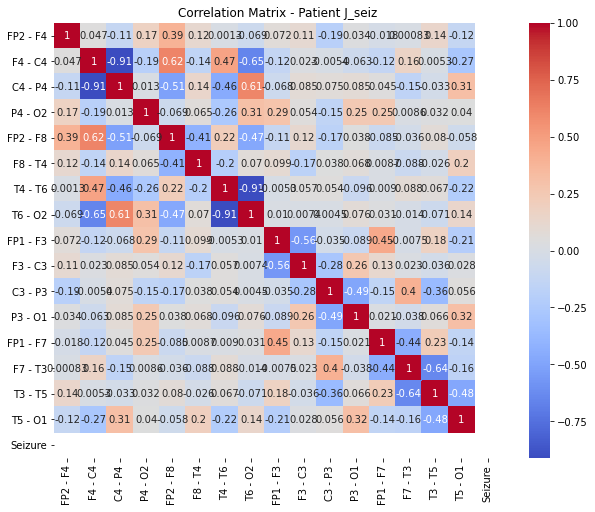

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the EEG data from the CSV file using Pandas
eeg_data = pd.read_csv('RawData_SNMC_EEG.csv')

# Define the patient ranges
patient_ranges = {
    'Patient A': (0, 4096),
    'Patient B': (4097, 8192),
    'Patient C': (8193, 12288),
    'Patient D': (12289, 16384),
    'Patient E': (16385, 20480),
    'Patient F': (20481, 24576),
    'Patient G': (24577, 28672),
    'Patient H': (28673, 32768),
    'Patient I': (32769, 36864),
    'Patient J': (36865, 39424),
    'Patient K': (39425, 43520),
    'Patient A_seiz': (43521, 55040),
    'Patient J_seiz': (55041, 87040)
}

# Select the columns representing EEG features
eeg_features = ['FP2 - F4', 'F4 - C4', 'C4 - P4', 'P4 - O2', 'FP2 - F8', 'F8 - T4', 'T4 - T6', 'T6 - O2',
                'FP1 - F3', 'F3 - C3', 'C3 - P3', 'P3 - O1', 'FP1 - F7', 'F7 - T3', 'T3 - T5', 'T5 - O1']

# Perform EDA for each patient
for patient, (start, end) in patient_ranges.items():
    # Extract the EEG data for the current patient
    patient_eeg = eeg_data.iloc[start:end]

    # Extract the features for EDA
    patient_features = patient_eeg[eeg_features]

    # Add a column for the target variable (1 for seizure, 0 for non-seizure)
    patient_features['Seizure'] = int('seiz' in patient.lower())

    # Summary statistics
    print(f"Patient: {patient}")
    print(patient_features.describe())

    # Distribution of EEG features
    plt.figure(figsize=(12, 6))
    plt.title(f"Distribution of EEG Features - {patient}")
    for feature in eeg_features:
        sns.histplot(data=patient_features, x=feature, hue='Seizure', kde=True, alpha=0.5, legend=False)
    plt.legend(['Non-Seizure', 'Seizure'])
    plt.show()

    # Correlation analysis
    plt.figure(figsize=(10, 8))
    plt.title(f"Correlation Matrix - {patient}")
    sns.heatmap(patient_features.corr(), annot=True, cmap='coolwarm')
    plt.show()


In [112]:
# # Convert the selected data to a numpy array
# eeg_dataA = selected_dataA.to_numpy()

# # Create a colormap
# cmap = 'jet'

# # Define the channel labels with additional details
# channel_labels = ['FP2 - F4 (Frontal)', 'F4 - C4 (Frontal)', 'C4 - P4 (Central)', 'P4 - O2 (Parietal)',
#                   'FP2 - F8 (Frontal)', 'F8 - T4 (Frontal)', 'T4 - T6 (Temporal)', 'T6 - O2 (Parietal)',
#                   'FP1 - F3 (Frontal)', 'F3 - C3 (Frontal)', 'C3 - P3 (Central)', 'P3 - O1 (Parietal)',
#                   'FP1 - F7 (Frontal)', 'F7 - T3 (Frontal)', 'T3 - T5 (Temporal)', 'T5 - O1 (Parietal)']

# # Increase the figure size
# plt.figure(figsize=(10,8))

# # Plot the image data
# plt.imshow(eeg_dataA, aspect='auto', cmap=cmap)
# plt.colorbar()

# # Set the y-axis ticks and labels
# plt.yticks(range(len(channel_labels)), channel_labels)
# plt.ylabel('Channels (Region)', rotation='vertical', fontsize=12)  # Rotate and modify the y-axis label

# # Set the x-axis label
# plt.xlabel('Samples')

# # Set the title
# plt.title('EEG Image Data Plot for Patient - A')

# # Show the plot
# plt.show()


In [113]:
# # Convert the selected data to a numpy array
# eeg_dataA = selected_dataA.to_numpy()
# # Define the channel labels
# channel_labels = ['FP2 - F4', 'F4 - C4', 'C4 - P4', 'P4 - O2', 'FP2 - F8', 'F8 - T4', 'T4 - T6', 'T6 - O2',
#                   'FP1 - F3', 'F3 - C3', 'C3 - P3', 'P3 - O1', 'FP1 - F7', 'F7 - T3', 'T3 - T5', 'T5 - O1']
# # Increase the figure size
# plt.figure(figsize=(12, 6))
# # Plot the line graph for each channel
# for i in range(len(channel_labels)):
#     plt.plot(eeg_dataA[i], label=channel_labels[i])
# # Set the y-axis label
# plt.ylabel('Amplitude')
# # Set the x-axis label
# plt.xlabel('Samples')
# # Set the title
# plt.title('EEG Data Line Graph - Patient A')
# # Show the legend
# plt.legend()
# # Show the plot
# plt.show()

In [114]:
# import mne
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Step 1: Read the CSV file and create RawArray object
# selected_dataA = dfeda.iloc[0:4095]
# eeg_data = data.values[:, 1:].T  # Assuming EEG data starts from the second column
# ch_names = data.columns[1:]  # Assuming the channel names are in the first row
# sfreq = 1000  # Assuming a sampling frequency of 1000 Hz

# info = mne.create_info(ch_names, sfreq, ch_types='eeg')
# raw = mne.io.RawArray(eeg_data, info)

# # Step 2: Plot the EEG data
# raw.plot(duration=10, n_channels=len(ch_names), scalings='auto')

# plt.show()


In [115]:
print(selected_dataJ.shape)

(2559, 16)


## Data Exploration

In [116]:
data.head()

,FP2 - F4,F4 - C4,C4 - P4,P4 - O2,FP2 - F8,F8 - T4,T4 - T6,T6 - O2,FP1 - F3,F3 - C3,C3 - P3,P3 - O1,FP1 - F7,F7 - T3,T3 - T5,T5 - O1,Outcome
0,14,-57,2,1,38,-46,-83,52,-33,-28,-39,64,-65,-30,54,5,0
1,-7,-81,49,-63,40,-34,-122,15,-23,0,-56,21,-27,12,-59,18,0
2,-3,-13,-12,-21,45,-32,-101,38,-11,1,-68,11,-2,56,-135,13,0
3,19,52,-86,86,48,-44,-48,114,-19,-25,-48,33,-11,34,-78,-5,0
4,39,34,-92,107,52,-53,-39,129,-34,-49,-29,63,-52,-18,36,-16,0


In [117]:
# to know the shape of the dataframe
data.shape

(87040, 17)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87040 entries, 0 to 87039
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FP2 - F4  87040 non-null  int64
 1   F4 - C4   87040 non-null  int64
 2   C4 - P4   87040 non-null  int64
 3   P4 - O2   87040 non-null  int64
 4   FP2 - F8  87040 non-null  int64
 5   F8 - T4   87040 non-null  int64
 6   T4 - T6   87040 non-null  int64
 7   T6 - O2   87040 non-null  int64
 8   FP1 - F3  87040 non-null  int64
 9   F3 - C3   87040 non-null  int64
 10  C3 - P3   87040 non-null  int64
 11  P3 - O1   87040 non-null  int64
 12  FP1 - F7  87040 non-null  int64
 13  F7 - T3   87040 non-null  int64
 14  T3 - T5   87040 non-null  int64
 15  T5 - O1   87040 non-null  int64
 16  Outcome   87040 non-null  int64
dtypes: int64(17)
memory usage: 11.3 MB


In [119]:
# to find out if there are missing values in the dataset
data.isnull().sum()

FP2 - F4    0
F4 - C4     0
C4 - P4     0
P4 - O2     0
FP2 - F8    0
F8 - T4     0
T4 - T6     0
T6 - O2     0
FP1 - F3    0
F3 - C3     0
C3 - P3     0
P3 - O1     0
FP1 - F7    0
F7 - T3     0
T3 - T5     0
T5 - O1     0
Outcome     0
dtype: int64

We can see that there are no missing values in the dataset.

In [120]:
data.describe()

,FP2 - F4,F4 - C4,C4 - P4,P4 - O2,FP2 - F8,F8 - T4,T4 - T6,T6 - O2,FP1 - F3,F3 - C3,C3 - P3,P3 - O1,FP1 - F7,F7 - T3,T3 - T5,T5 - O1,Outcome
count,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000
mean,0.363660,-56.294187,20.964717,6.765361,-19.447231,-51.995255,-40.223840,83.599897,15.515211,-18.245083,-4.309524,19.311765,-26.667773,17.200747,-14.235823,35.252930,0.500000
std,516.591736,568.735841,506.603956,446.376444,748.123209,631.772366,903.225902,1032.287941,592.257435,600.144831,507.931378,616.825404,553.172245,553.999391,533.952403,675.086055,0.500003
min,-9370.000000,-9370.000000,-9184.000000,-9074.000000,-9333.000000,-9335.000000,-9332.000000,-9334.000000,-9334.000000,-9334.000000,-9148.000000,-9372.000000,-9442.000000,-9370.000000,-9334.000000,-9185.000000,0.000000
25%,-52.000000,-60.000000,-56.000000,-58.000000,-111.000000,-75.000000,-75.000000,-48.000000,-54.000000,-67.000000,-49.000000,-74.000000,-77.000000,-53.000000,-90.000000,-37.000000,0.000000
50%,0.000000,-7.000000,-5.000000,0.000000,2.000000,-22.000000,-2.000000,12.000000,-8.000000,-7.000000,0.000000,3.000000,-15.000000,0.000000,-1.000000,15.000000,0.500000
75%,42.000000,30.000000,50.000000,54.000000,71.000000,37.000000,54.000000,112.000000,46.000000,30.000000,40.000000,67.000000,35.000000,58.000000,51.000000,65.000000,1.000000
max,9370.000000,9197.000000,9334.000000,9221.000000,9292.000000,9405.000000,9297.000000,9333.000000,9445.000000,9373.000000,9371.000000,9443.000000,9296.000000,9371.000000,9332.000000,9334.000000,1.000000


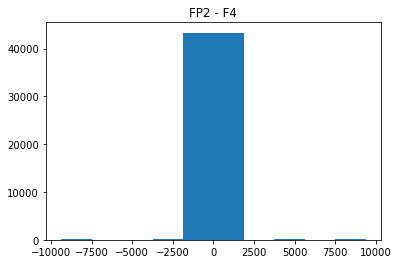

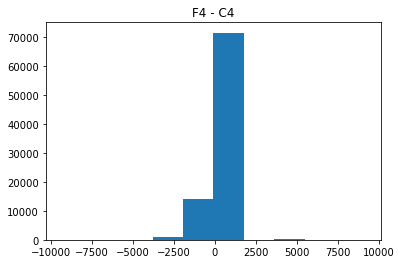

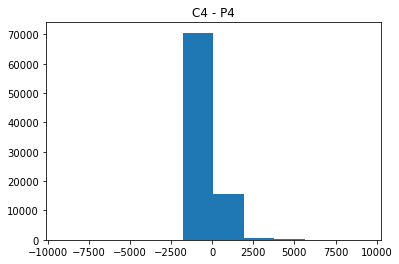

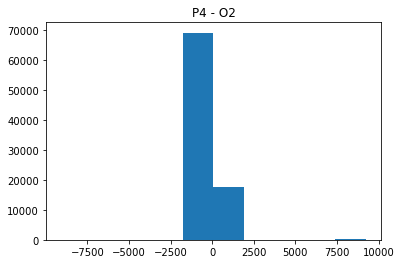

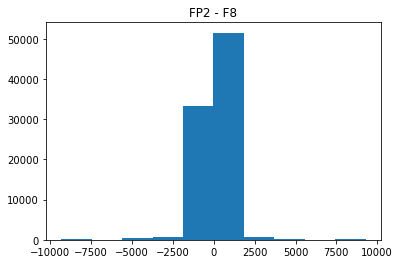

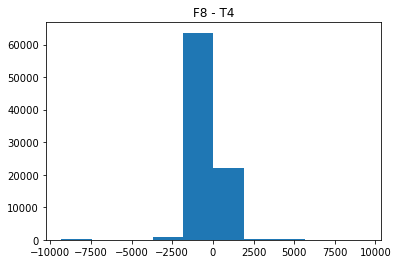

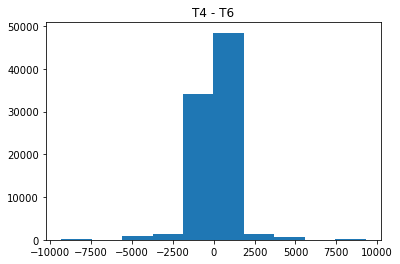

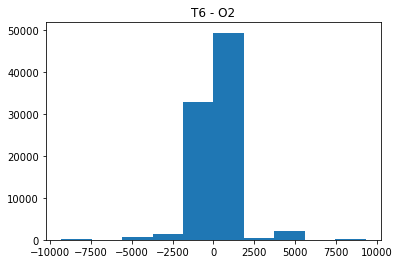

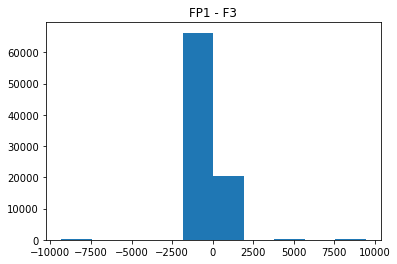

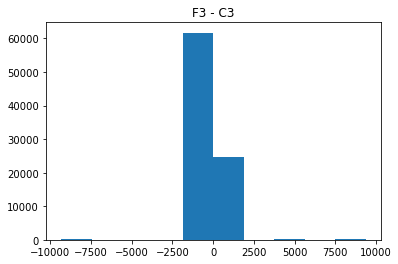

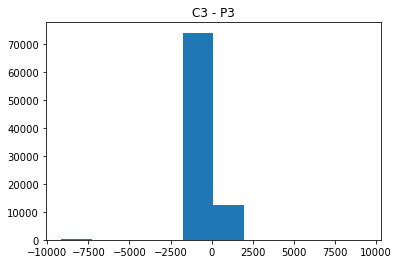

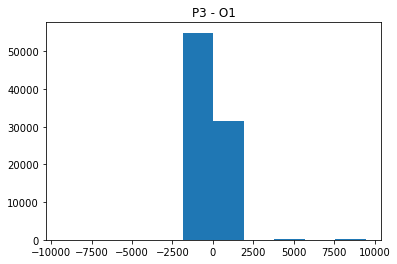

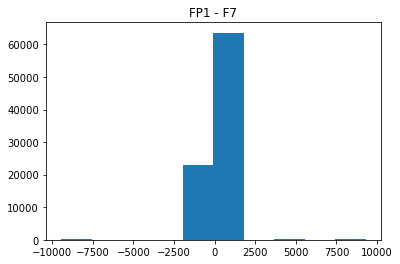

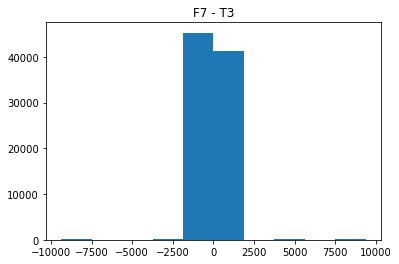

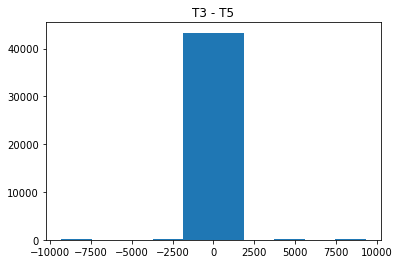

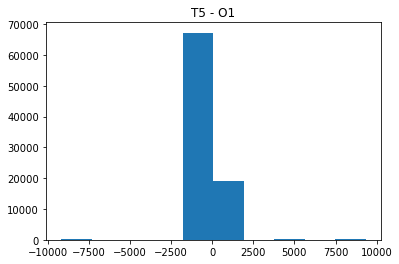

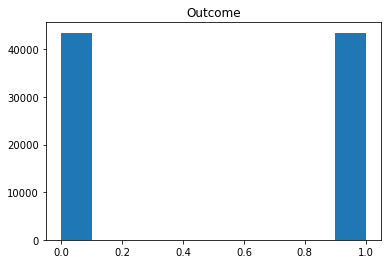

In [121]:
#distributions for all numeric variables 
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [122]:
# print(df_num.corr())

<AxesSubplot:>

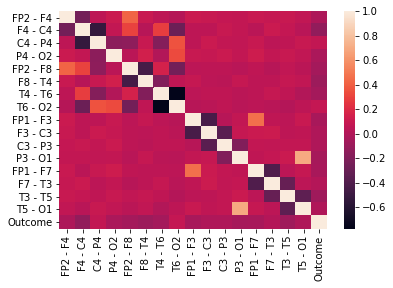

In [123]:
sns.heatmap(data.corr())

In [124]:
# splitting the data into input and target variable

X=data.drop('Outcome', axis=1)
y=data['Outcome']

In [125]:
X.shape

(87040, 16)

In [126]:
y.shape 

(87040,)

## Model Building

We shall be spitting the dataset twice for each of the classifier model. Once in a 50-50 train-test split and once in a 80-20 train-test split. The different models that we will use are
1. k-Nearest Neighbor
2. Decision Trees
3. Naive Bayes
4. Random Forest

### 1. k-Nearest Neighbour

#### 50% train-test split

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [128]:
X_test.shape, y_test.shape

((43520, 16), (43520,))

In [129]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier
kNN_model_1 = KNeighborsClassifier(n_neighbors=1)
kNN_model_2 = KNeighborsClassifier(n_neighbors=3)
kNN_model_3 = KNeighborsClassifier(n_neighbors=5)
kNN_model_4 = KNeighborsClassifier(n_neighbors=7)

In [130]:
# training the model for k=1
kNN_model_1.fit(X_train, y_train)

# predicting
y_pred = kNN_model_1.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9890395220588235


In [131]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9829822086727033
Recall: 0.9952547682668387


In [132]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[21440   374]
 [  103 21603]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21814
           1       0.98      1.00      0.99     21706

    accuracy                           0.99     43520
   macro avg       0.99      0.99      0.99     43520
weighted avg       0.99      0.99      0.99     43520



In [133]:
# for k value=3

kNN_model_2.fit(X_train, y_train)

# predicting
y_pred = kNN_model_2.predict(X_test)

# accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9850873161764706


In [134]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9753058552661279
Recall: 0.9953008384778402


In [135]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[21267   547]
 [  102 21604]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     21814
           1       0.98      1.00      0.99     21706

    accuracy                           0.99     43520
   macro avg       0.99      0.99      0.99     43520
weighted avg       0.99      0.99      0.99     43520



In [136]:
# for k value=5

kNN_model_3.fit(X_train, y_train)

# predicting
y_pred = kNN_model_3.predict(X_test)

# accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9813648897058823


In [137]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9680989291634929
Recall: 0.9954390491108449


In [138]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[21102   712]
 [   99 21607]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     21814
           1       0.97      1.00      0.98     21706

    accuracy                           0.98     43520
   macro avg       0.98      0.98      0.98     43520
weighted avg       0.98      0.98      0.98     43520



In [139]:
# for k value=7

kNN_model_4.fit(X_train, y_train)

# predicting
y_pred = kNN_model_4.predict(X_test)

# accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9783088235294117


In [140]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9626114081996435
Recall: 0.9951626278448356


In [141]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[20975   839]
 [  105 21601]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     21814
           1       0.96      1.00      0.98     21706

    accuracy                           0.98     43520
   macro avg       0.98      0.98      0.98     43520
weighted avg       0.98      0.98      0.98     43520



#### 80% train-test split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [143]:
X_test.shape, y_test.shape

((17408, 16), (17408,))

In [144]:
X.shape

(87040, 16)

In [145]:
# KNN Classification

kNN_model_5 = KNeighborsClassifier(n_neighbors=1)
kNN_model_6 = KNeighborsClassifier(n_neighbors=3)
kNN_model_7 = KNeighborsClassifier(n_neighbors=5)
kNN_model_8 = KNeighborsClassifier(n_neighbors=7)

In [146]:
# training the model for k=1
kNN_model_5.fit(X_train, y_train)

# predicting
y_pred = kNN_model_5.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897748161764706


In [147]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9849846433852804
Recall: 0.9947156806433084


In [148]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8571  132]
 [  46 8659]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8703
           1       0.98      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



In [149]:
# training the model for k=3
kNN_model_6.fit(X_train, y_train)

# predicting
y_pred = kNN_model_6.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9880514705882353


In [150]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9817439619004422
Recall: 0.9946008041355543


In [151]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8542  161]
 [  47 8658]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8703
           1       0.98      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



In [152]:
# training the model for k=5
kNN_model_7.fit(X_train, y_train)

# predicting
y_pred = kNN_model_7.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9852366727941176


In [153]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9765342960288809
Recall: 0.994371051120046


In [154]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8495  208]
 [  49 8656]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8703
           1       0.98      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



In [155]:
# training the model for k=7
kNN_model_8.fit(X_train, y_train)

# predicting
y_pred = kNN_model_8.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9824793198529411


In [156]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9710632570659489
Recall: 0.9946008041355543


In [157]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8445  258]
 [  47 8658]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8703
           1       0.97      0.99      0.98      8705

    accuracy                           0.98     17408
   macro avg       0.98      0.98      0.98     17408
weighted avg       0.98      0.98      0.98     17408



### 2. Decision Trees

In [158]:
from sklearn.tree import DecisionTreeClassifier

#### 50% train-test split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [160]:
X_test.shape

(43520, 16)

In [161]:
DT1 = DecisionTreeClassifier(random_state=0)

# training the classifier
DT1 = DT1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT1.predict(X_test)

In [162]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9665670955882353


In [163]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9632188114735349
Recall: 0.9700082926379803


In [164]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[21010   804]
 [  651 21055]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     21814
           1       0.96      0.97      0.97     21706

    accuracy                           0.97     43520
   macro avg       0.97      0.97      0.97     43520
weighted avg       0.97      0.97      0.97     43520



#### 80% train-test split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [166]:
X_test.shape

(17408, 16)

In [167]:
DT2 = DecisionTreeClassifier(random_state=0)

# training
DT2 = DT2.fit(X_train,y_train)

# predictiong
y_pred = DT2.predict(X_test)

In [168]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9730583639705882


In [169]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9696624087591241
Recall: 0.9766800689259046


In [170]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8437  266]
 [ 203 8502]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8703
           1       0.97      0.98      0.97      8705

    accuracy                           0.97     17408
   macro avg       0.97      0.97      0.97     17408
weighted avg       0.97      0.97      0.97     17408



### 3. Naive Bayes Classifier

#### 50% train-test split

In [171]:
from sklearn.naive_bayes import GaussianNB

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [173]:
gnb1 = GaussianNB()

# training
gnb1.fit(X_train, y_train)

# predictiong
y_pred = gnb1.predict(X_test)

In [174]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5810202205882353


In [175]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5482570745538444
Recall: 0.9086427715838938


In [176]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[ 5563 16251]
 [ 1983 19723]]
              precision    recall  f1-score   support

           0       0.74      0.26      0.38     21814
           1       0.55      0.91      0.68     21706

    accuracy                           0.58     43520
   macro avg       0.64      0.58      0.53     43520
weighted avg       0.64      0.58      0.53     43520



#### 80% train test split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [178]:
gnb2 = GaussianNB()

# training
gnb2.fit(X_train, y_train)

# predictiong
y_pred = gnb2.predict(X_test)

In [179]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5801355698529411


In [180]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5484520338747744
Recall: 0.907639287765652


In [181]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[2198 6505]
 [ 804 7901]]
              precision    recall  f1-score   support

           0       0.73      0.25      0.38      8703
           1       0.55      0.91      0.68      8705

    accuracy                           0.58     17408
   macro avg       0.64      0.58      0.53     17408
weighted avg       0.64      0.58      0.53     17408



### 4. Random Forest Classifier

#### 50% train-test split

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [184]:
rfc1=RandomForestClassifier(n_estimators=100, random_state=0)

# training
rfc1.fit(X_train,y_train)

# predict
y_pred = rfc1.predict(X_test)

In [185]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9919806985294117


In [186]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9904018369690012
Recall: 0.9935501704597807


In [187]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[21605   209]
 [  140 21566]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21814
           1       0.99      0.99      0.99     21706

    accuracy                           0.99     43520
   macro avg       0.99      0.99      0.99     43520
weighted avg       0.99      0.99      0.99     43520



#### 80% train-test split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [189]:
rfc2=RandomForestClassifier(n_estimators=100, random_state=0)

# training
rfc2.fit(X_train,y_train)

# predict
y_pred = rfc2.predict(X_test)

In [190]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9920726102941176


In [191]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9911707373007682
Recall: 0.992992533026996


In [192]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8626   77]
 [  61 8644]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8703
           1       0.99      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



#### Finding Important Features

In [193]:
feature_imp = pd.Series(rfc2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

T3 - T5     0.130202
F4 - C4     0.119154
T6 - O2     0.090790
T4 - T6     0.073727
P4 - O2     0.067644
P3 - O1     0.062464
C4 - P4     0.061641
C3 - P3     0.057668
FP2 - F8    0.052149
T5 - O1     0.051932
F8 - T4     0.050386
FP1 - F3    0.041490
FP1 - F7    0.040026
F7 - T3     0.037482
F3 - C3     0.036194
FP2 - F4    0.027051
dtype: float64

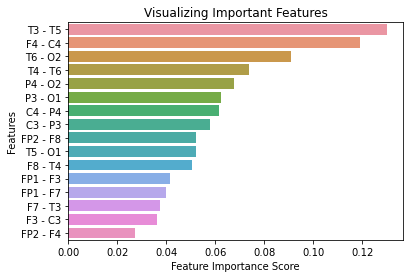

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [195]:
# dropping the least important feature and building the model again to see its effect on the accuracy

X_train = X_train.drop(['FP2 - F4'], axis=1,errors='ignore')

X_test = X_test.drop(['FP2 - F4'], axis=1,errors='ignore')

# building the model again

rfc_imp_features=RandomForestClassifier(n_estimators=100, random_state=0)

# training
rfc_imp_features.fit(X_train,y_train)

# predict
y_pred = rfc_imp_features.predict(X_test)

# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9919002757352942


In [196]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9904925544100802
Recall: 0.9933371625502585


In [197]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8620   83]
 [  58 8647]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8703
           1       0.99      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



### 5. Neural Network

#### 50% train-test split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [199]:
from keras.models import Sequential
from keras.layers import Dense

In [200]:
# defining the model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [201]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [202]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
4352/4352 [==============================] - 5s 1ms/step - loss: 3.1988 - accuracy: 0.6415
Epoch 2/150
4352/4352 [==============================] - 4s 1ms/step - loss: 0.6155 - accuracy: 0.6872
Epoch 3/150
4352/4352 [==============================] - 4s 958us/step - loss: 0.4790 - accuracy: 0.7590
Epoch 4/150
4352/4352 [==============================] - 4s 1ms/step - loss: 0.3976 - accuracy: 0.8290
Epoch 5/150
4352/4352 [==============================] - 5s 1ms/step - loss: 0.3482 - accuracy: 0.8566
Epoch 6/150
4352/4352 [==============================] - 5s 1ms/step - loss: 0.3199 - accuracy: 0.8768
Epoch 7/150
4352/4352 [==============================] - 4s 977us/step - loss: 0.2876 - accuracy: 0.8912
Epoch 8/150
4352/4352 [==============================] - 4s 1ms/step - loss: 0.2600 - accuracy: 0.9057
Epoch 9/150
4352/4352 [==============================] - 5s 1ms/step - loss: 0.2388 - accuracy: 0.9145
Epoch 10/150
4352/4352 [==============================] - 4s 982us/st

In [203]:
# predicting
y_pred = (model.predict(X_test) > 0.5).astype(int)

1360/1360 [==============================] - 1s 849us/step


In [204]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9585248161764706


In [205]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9398399858551032
Recall: 0.9795448263153045


In [206]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[20453  1361]
 [  444 21262]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     21814
           1       0.94      0.98      0.96     21706

    accuracy                           0.96     43520
   macro avg       0.96      0.96      0.96     43520
weighted avg       0.96      0.96      0.96     43520



#### 80% train-test split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [208]:
# defining the model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [209]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [210]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
6964/6964 [==============================] - 9s 1ms/step - loss: 2.4373 - accuracy: 0.6180
Epoch 2/150
6964/6964 [==============================] - 10s 2ms/step - loss: 0.5302 - accuracy: 0.7058
Epoch 3/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.4088 - accuracy: 0.8108
Epoch 4/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.3587 - accuracy: 0.8446
Epoch 5/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.3134 - accuracy: 0.8790
Epoch 6/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.2707 - accuracy: 0.8999
Epoch 7/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.2480 - accuracy: 0.9078
Epoch 8/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.2296 - accuracy: 0.9150
Epoch 9/150
6964/6964 [==============================] - 8s 1ms/step - loss: 0.2180 - accuracy: 0.9218
Epoch 10/150
6964/6964 [==============================] - 8s 1ms/step - 

In [211]:
# predicting
y_pred = (model.predict(X_test) > 0.5).astype(int)

544/544 [==============================] - 0s 674us/step


In [212]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9608226102941176


In [213]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9448818897637795
Recall: 0.9787478460654796


In [214]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8206  497]
 [ 185 8520]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8703
           1       0.94      0.98      0.96      8705

    accuracy                           0.96     17408
   macro avg       0.96      0.96      0.96     17408
weighted avg       0.96      0.96      0.96     17408



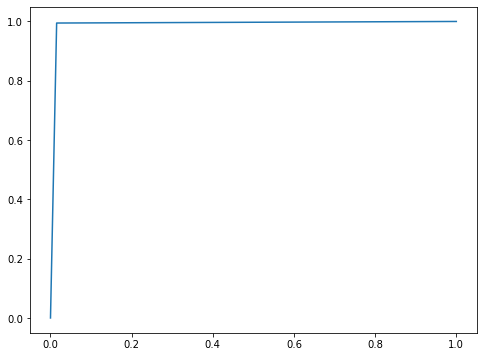

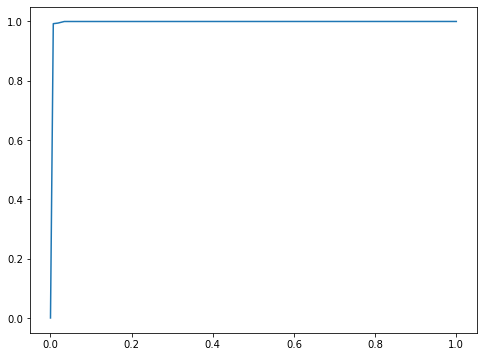

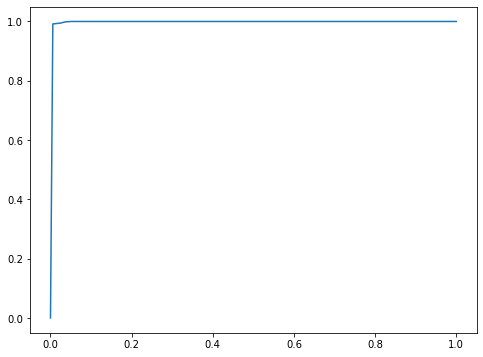

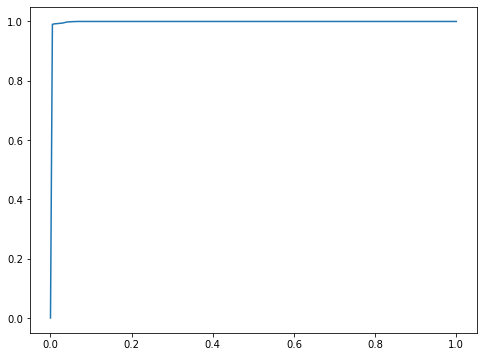

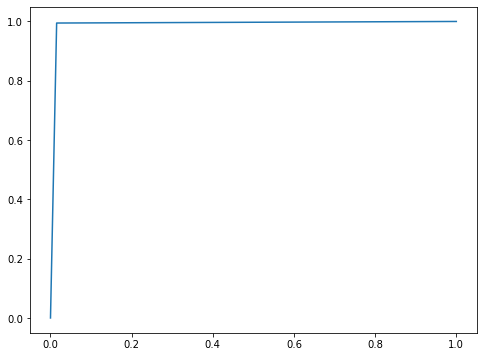

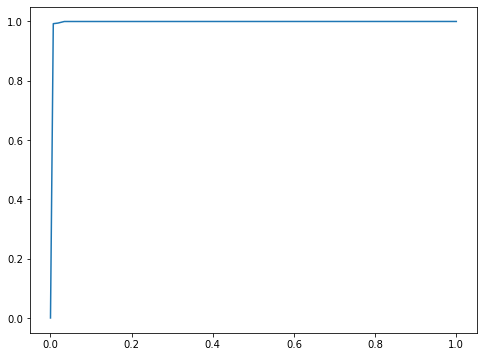

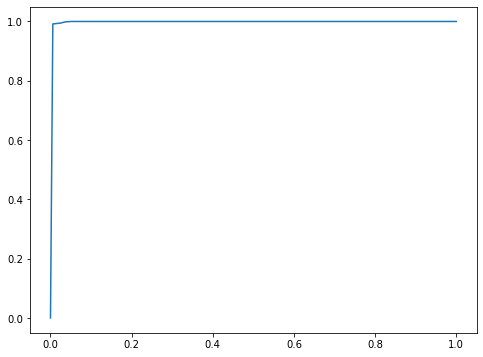

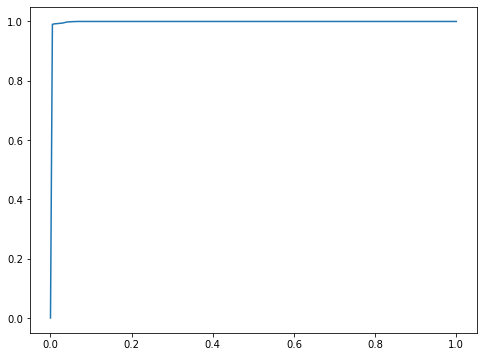

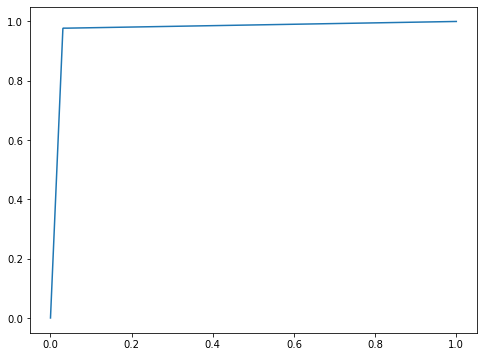

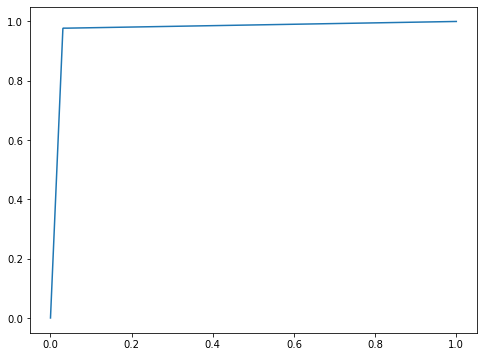

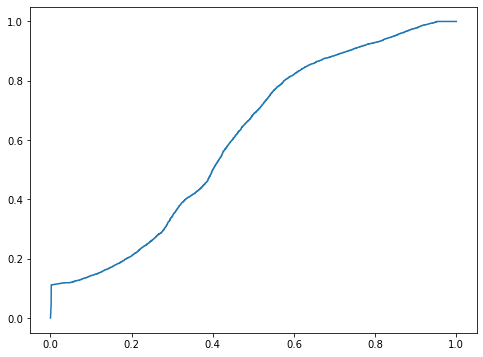

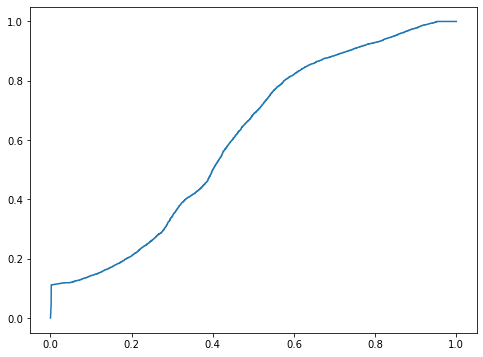

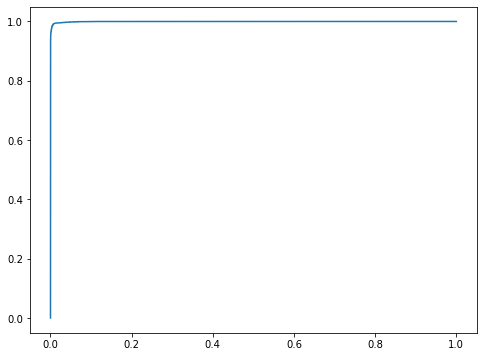

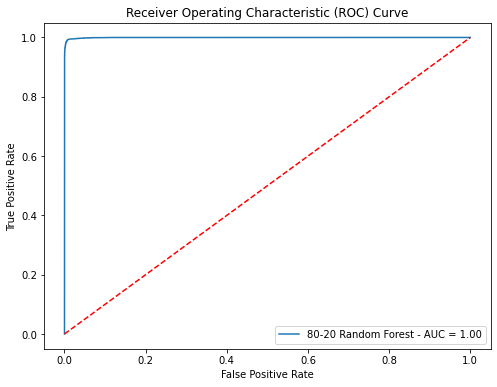

50-50 kNN Model 1: AUC-ROC = 0.99
50-50 kNN Model 2: AUC-ROC = 1.00
50-50 kNN Model 3: AUC-ROC = 1.00
50-50 kNN Model 4: AUC-ROC = 1.00
80-20 kNN Model 5: AUC-ROC = 0.99
80-20 kNN Model 6: AUC-ROC = 1.00
80-20 kNN Model 7: AUC-ROC = 1.00
80-20 kNN Model 8: AUC-ROC = 1.00
50-50 Decision Tree: AUC-ROC = 0.97
80-20 Decision Tree: AUC-ROC = 0.97
50-50 Naive Bayes: AUC-ROC = 0.61
80-20 Naive Bayes: AUC-ROC = 0.61
50-50 Random Forest: AUC-ROC = 1.00
80-20 Random Forest: AUC-ROC = 1.00


In [217]:
# Define the models
models = {
    '50-50 kNN Model 1': kNN_model_1,
    '50-50 kNN Model 2': kNN_model_2,
    '50-50 kNN Model 3': kNN_model_3,
    '50-50 kNN Model 4': kNN_model_4,
    '80-20 kNN Model 5': kNN_model_5,
    '80-20 kNN Model 6': kNN_model_6,
    '80-20 kNN Model 7': kNN_model_7,
    '80-20 kNN Model 8': kNN_model_8,
    '50-50 Decision Tree': DT1,
    '80-20 Decision Tree': DT2,
    '50-50 Naive Bayes': gnb1,
    '80-20 Naive Bayes': gnb2,
    '50-50 Random Forest': rfc1,
    '80-20 Random Forest': rfc2
}

# Initialize empty lists to store the results
fpr_list = []
tpr_list = []
auc_list = []

# Perform ROC analysis for each model
for model_name, model in models.items():
    # Fit the model and obtain the predicted probabilities
    model.fit(X_train, y_train)  # Replace X_train and y_train with your training data
    predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Replace X_test with your test data

    # Calculate the false positive rate, true positive rate, and AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
    auc = roc_auc_score(y_test, predicted_probabilities)

    # Store the results
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))  # Adjust the size of the figure as desired
    plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc:.2f}')

# Set labels and title for the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Add a diagonal line representing the random classifier
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot
plt.show()

# Print the AUC-ROC values
for model_name, auc in zip(models.keys(), auc_list):
    print(f'{model_name}: AUC-ROC = {auc:.2f}')

    

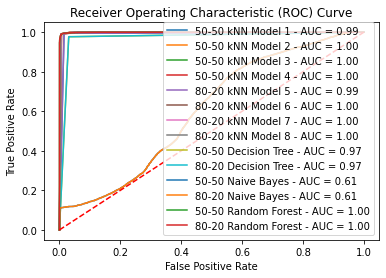

50-50 kNN Model 1: AUC-ROC = 0.99
50-50 kNN Model 2: AUC-ROC = 1.00
50-50 kNN Model 3: AUC-ROC = 1.00
50-50 kNN Model 4: AUC-ROC = 1.00
80-20 kNN Model 5: AUC-ROC = 0.99
80-20 kNN Model 6: AUC-ROC = 1.00
80-20 kNN Model 7: AUC-ROC = 1.00
80-20 kNN Model 8: AUC-ROC = 1.00
50-50 Decision Tree: AUC-ROC = 0.97
80-20 Decision Tree: AUC-ROC = 0.97
50-50 Naive Bayes: AUC-ROC = 0.61
80-20 Naive Bayes: AUC-ROC = 0.61
50-50 Random Forest: AUC-ROC = 1.00
80-20 Random Forest: AUC-ROC = 1.00


In [216]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = {
    '50-50 kNN Model 1': kNN_model_1,
    '50-50 kNN Model 2': kNN_model_2,
    '50-50 kNN Model 3': kNN_model_3,
    '50-50 kNN Model 4': kNN_model_4,
    '80-20 kNN Model 5': kNN_model_5,
    '80-20 kNN Model 6': kNN_model_6,
    '80-20 kNN Model 7': kNN_model_7,
    '80-20 kNN Model 8': kNN_model_8,
    '50-50 Decision Tree': DT1,
    '80-20 Decision Tree': DT2,
    '50-50 Naive Bayes': gnb1,
    '80-20 Naive Bayes': gnb2,
    '50-50 Random Forest': rfc1,
    '80-20 Random Forest': rfc2
}

# Initialize empty lists to store the results
fpr_list = []
tpr_list = []
auc_list = []

# Perform ROC analysis for each model
for model_name, model in models.items():
    # Fit the model and obtain the predicted probabilities
    model.fit(X_train, y_train)  # Replace X_train and y_train with your training data
    predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Replace X_test with your test data

    # Calculate the false positive rate, true positive rate, and AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
    auc = roc_auc_score(y_test, predicted_probabilities)

    # Store the results
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc:.2f}')

# Set labels and title for the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Add a diagonal line representing the random classifier
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot
plt.show()

# Print the AUC-ROC values
for model_name, auc in zip(models.keys(), auc_list):
    print(f'{model_name}: AUC-ROC = {auc:.2f}')


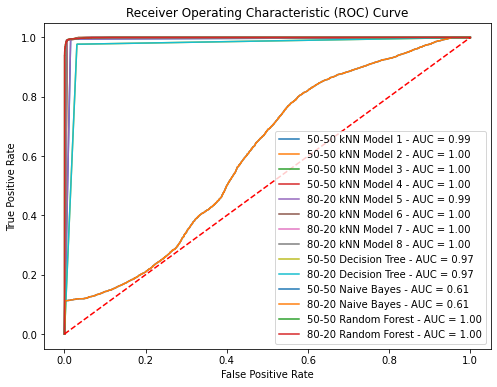

50-50 kNN Model 1: AUC-ROC = 0.99
50-50 kNN Model 2: AUC-ROC = 1.00
50-50 kNN Model 3: AUC-ROC = 1.00
50-50 kNN Model 4: AUC-ROC = 1.00
80-20 kNN Model 5: AUC-ROC = 0.99
80-20 kNN Model 6: AUC-ROC = 1.00
80-20 kNN Model 7: AUC-ROC = 1.00
80-20 kNN Model 8: AUC-ROC = 1.00
50-50 Decision Tree: AUC-ROC = 0.97
80-20 Decision Tree: AUC-ROC = 0.97
50-50 Naive Bayes: AUC-ROC = 0.61
80-20 Naive Bayes: AUC-ROC = 0.61
50-50 Random Forest: AUC-ROC = 1.00
80-20 Random Forest: AUC-ROC = 1.00


In [218]:
# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the width and height as desired

# Perform ROC analysis for each model
for model_name, model in models.items():
    # Fit the model and obtain the predicted probabilities
    model.fit(X_train, y_train)  # Replace X_train and y_train with your training data
    predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Replace X_test with your test data

    # Calculate the false positive rate, true positive rate, and AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
    auc = roc_auc_score(y_test, predicted_probabilities)

    # Store the results
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc:.2f}')

# Set labels and title for the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Add a diagonal line representing the random classifier
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot
plt.show()

# Print the AUC-ROC values
for model_name, auc in zip(models.keys(), auc_list):
    print(f'{model_name}: AUC-ROC = {auc:.2f}')


## Result and Conclusion

<b>For the 50-50 split, the accuracy was as follows</b>
<ol>
<li>Random Forest Classifier
    <ul><li>accuracy = 99.198</li></ul>
    </li>
<li>k-NN
    <ul><li>accuracy = 98.903% for k=1</li>
    <li>accuracy = 98.508% for k=3</li>
    <li>accuracy = 98.136% for k=5</li>
    <li>accuracy = 97.830% for k=7</li>
    </ul>
</li>
<li>
Decision Trees
    <ul><li>accuracy = 96.656</li>
    </ul>
</li>
<li>
Naive Bayes
    <ul><li>accuracy = 58.102</li>
    </ul>
</li>

<b>For the 80-20 split, the accuracy was as follows</b>
<ol>
    <li>Random Forest Classifier
    <ul><li>accuracy = 99.207</li></ul>
    </li>
<li>k-NN
    <ul><li>accuracy = 98.977% for k=1</li>
    <li>accuracy = 98.805% for k=3</li>
    <li>accuracy = 98.523% for k=5</li>
    <li>accuracy = 98.247% for k=7</li>
    </ul>
</li>
<li>
Decision Trees
    <ul><li>accuracy = 97.305</li>
    </ul>
</li>
<li>
Naive Bayes
    <ul><li>accuracy = 58.013</li>
    </ul>
</li>
</ol>

Hence it can be concluded that Random Forest Classifier yielded the best results in terms of accuracy. For precision, in the 80-20 split of the data, Random Forest was still the best with precision of 99.11. The highest recall was yielded by the kNN algorith in the 50-50 test-train split with k=5 with 99.543.